In [1]:
%matplotlib inline

# PCA example with Iris Data-set


Principal Component Analysis applied to the Iris dataset.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.

## Import Library

In [1]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets



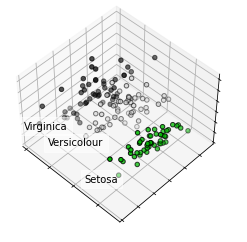

In [4]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

# Another Example

## IMPORT LIBRARY

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## ADD DATASET

In [5]:
m_data = pd.read_csv('dataset/mushrooms.csv')

## SOURCE CODE

In [6]:
# Machine learning systems work with integers, we need to encode these
# string characters into ints

encoder = LabelEncoder()

# Now apply the transformation to all the columns:
for col in m_data.columns:
    m_data[col] = encoder.fit_transform(m_data[col])

X_features = m_data.iloc[:,1:23]
y_label = m_data.iloc[:, 0]

In [7]:
# Scale the features
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

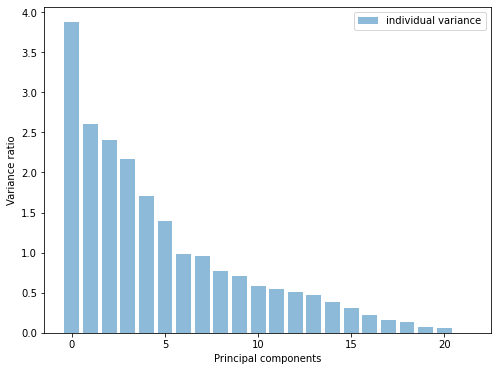

In [8]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

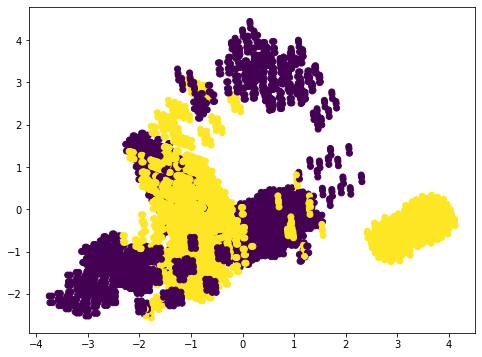

In [9]:
pca2 = PCA(n_components=17)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=m_data['class'])
plt.show()

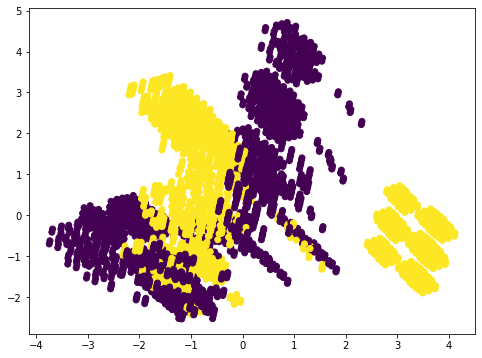

In [10]:
pca3 = PCA(n_components=2)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=m_data['class'])
plt.show()